In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


## Generate toy data

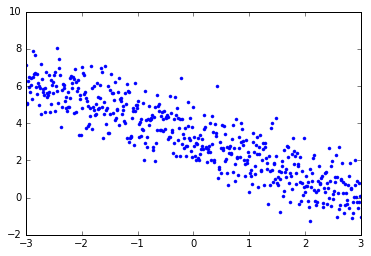

In [2]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig =  3.3 -1.1*x 
## Add white noise
y =  y_orig + 1*np.random.randn(N)
plt.plot(x, y, '.')

## Create train, validation, test splits

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

Viusalize train, validation, and test splits

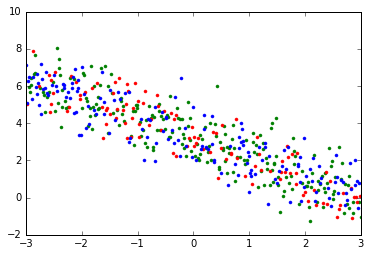

In [4]:
plt.plot(X_train, y_train, 'g.')
plt.plot(X_val, y_val, 'r.')
plt.plot(X_test, y_test, 'b.')

## Greedy hill climbing

Initialize a set of wets and visualize on loss:

In [5]:
w = np.random.randn(2,1)

In [6]:
num_iter = 1000
weights = []
weights.append(w)


def mse(w, X, y):
    return np.sum((y - w[0,0]-w[1,0]*X)**2)

loss = mse(w, X_train[:,np.newaxis], y_train)
losses = []
losses.append(loss)
for i in range(num_iter):
    w_new = w + .01*np.random.randn(2,1)
    new_loss = mse(w_new, X_train[:,np.newaxis], y_train)
    if new_loss < loss:
        loss = new_loss
        w = w_new
        weights.append(w)
        losses.append(loss)
        
weights = np.array(weights).squeeze()

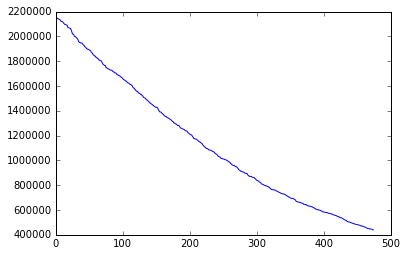

In [7]:
plt.plot(losses)

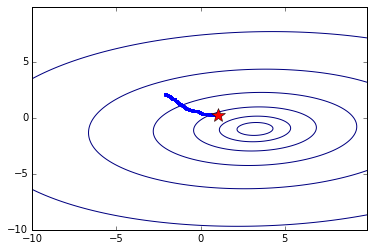

In [8]:
def loss_func(w0, w1, X, y):
    losses = 0
    for i in range(X.shape[0]):
        losses += (w0 + X[i]*w1 - y[i])**2
    return losses
 
w0 = np.arange(-10.0,10.0,0.1)
w1 = np.arange(-10.0,10.0,0.1)
W0,W1 = plt.meshgrid(w0, w1)
Z = loss_func(W0, W1, X_test, y_test)
plt.contour(W0, W1, Z, levels = np.logspace(0, 8, 20))
plt.plot(weights[:,0], weights[:,1], 'b.', markersize=5)
plt.plot(weights[-1,0], weights[-1,1], 'r*', markersize=15)

## SGD

In [9]:
X_hat_train = np.hstack((np.ones((X_train.shape[0],1)), X_train[:,np.newaxis]))
X_hat_val = np.hstack((np.ones((X_val.shape[0],1)), X_val[:,np.newaxis]))

In [10]:
w = 0*np.random.randn(2,1)
alpha = 1e-1
train_error = []
validation_error = []
for i in range(10):    
    for k in range(X_hat_train.shape[0]):
        y_hat_train = np.dot(X_hat_train[k,:], w)
        w = w + alpha*(X_hat_train[k,:]*(y_train[k, np.newaxis] - y_hat_train))[:,np.newaxis]
    
    y_hat_train = np.dot(X_hat_train, w)
    train_error.append(np.mean(np.abs(y_hat_train - y_train)))
    y_hat_val = np.dot(X_hat_val, w)
    validation_error.append(np.mean(np.abs(y_hat_val - y_val)))
    
    if len(train_error) > 5:
        if np.abs(train_error[-1] - train_error[-2]) < 1e-2:
            alpha = .9*alpha

w    

array([[ 3.54867469],
       [-1.4576638 ]])

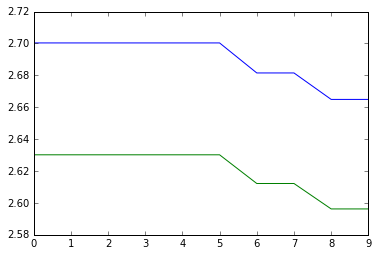

In [11]:
plt.plot(train_error, 'g')
plt.plot(validation_error, 'b')